## Initial Analysis - Constraints on Atmospheric Transmissivity from Stellar Photometry - May/June 2015

This ipython notebook will run through the initial analysis described in section 2.2 of the research paper titled above. Note: This notebook contains LSST stack dependencies and several script imports; this notebook uses the atmoBuilder class contrary to the original initialAnalysis notebook. Furthermore, this notebook will focus on integrating principles from AstroML:  Chapter 8 on linear and nonlinear regressions with log-likelihood functions.

Requires the following to be sourced / setup with eups:
- setup sims_photUtils -t sims
- setup sims_sed_library -t sims

Requires astroML to be installed

Regression Types:
- [$H_2O$ and $O_2$](#$H_2O$-and-$O_2$:)
- [$O_2$ and $O_3$](#$O_2$-and-$O_3$:)
- [Rayleigh and Aerosol](#Rayleigh-and-Aerosol:)
- [Rayleigh and Alpha](#Rayleigh-and-Alpha:)
- [Aerosol and Alpha](#Aerosol-and-Alpha:)

In [1]:
from AtmoBuilder import AtmoBuilder

% matplotlib inline

In [2]:
ab = AtmoBuilder()

Found 16 MODTRAN files:
Pachon_MODTRAN.10.7sc
Pachon_MODTRAN.11.7sc
Pachon_MODTRAN.12.7sc
Pachon_MODTRAN.13.7sc
Pachon_MODTRAN.14.7sc
Pachon_MODTRAN.15.7sc
Pachon_MODTRAN.16.7sc
Pachon_MODTRAN.17.7sc
Pachon_MODTRAN.18.7sc
Pachon_MODTRAN.19.7sc
Pachon_MODTRAN.20.7sc
Pachon_MODTRAN.21.7sc
Pachon_MODTRAN.22.7sc
Pachon_MODTRAN.23.7sc
Pachon_MODTRAN.24.7sc
Pachon_MODTRAN.25.7sc
MODTRAN files have been read.

Read filter data from LSST software stack.
Filters: ['u', 'g', 'r', 'i', 'z', 'y4']
Read hardware data from LSST software stack.


In [3]:
ab.readAll()

# Read 988 MS stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/kurucz/
# Read 849 white dwarfs from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/wDs/
# Read 74 mlt stars from /Users/joachim/lsst/DarwinX86/sims_sed_library/2014.10.06/starSED/mlt/
# Generated 2520 galaxies at redshifts between 0.000000 and 3.000000
# Generated 76 quasars at redshifts between 0.000000 and 7.500000
# Generated 39 sn's at redshifts between 0.000000 and 1.200000 on days ['0', '20', '40']


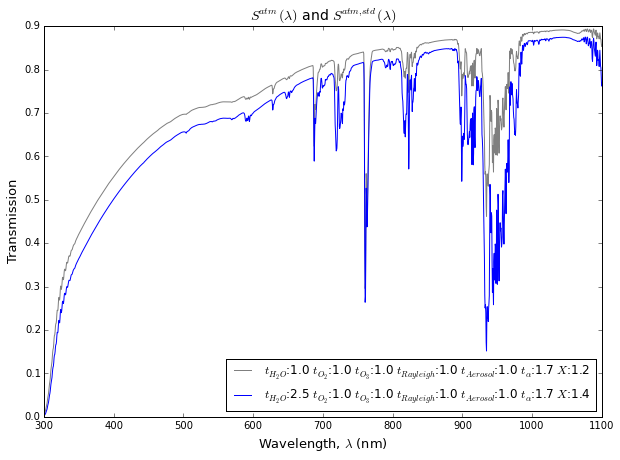

In [4]:
atmo_H2O = ab.buildAtmo([2.5,1.0,1.0,1.0,1.0,1.7],1.4)
ab.transPlot(atmo_H2O, includeStdAtmo=True)

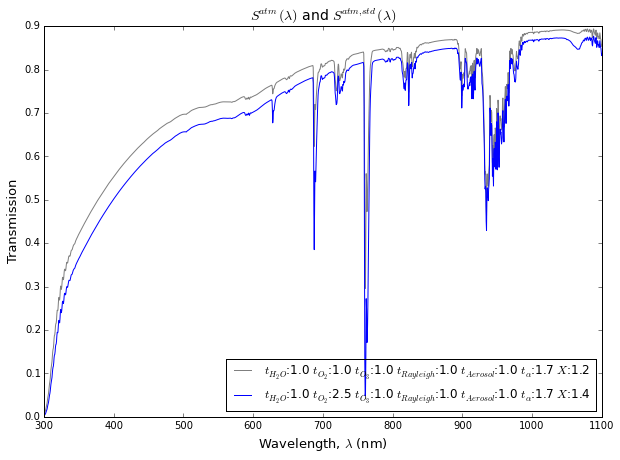

In [5]:
atmo_O2 = ab.buildAtmo([1.0,2.5,1.0,1.0,1.0,1.7],1.4)
ab.transPlot(atmo_O2, includeStdAtmo=True)

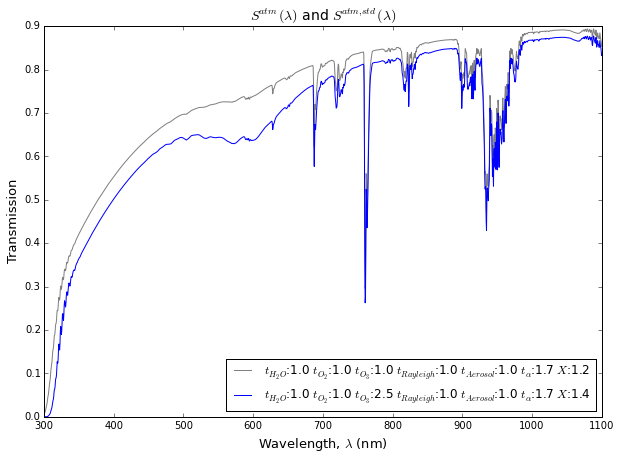

In [6]:
atmo_O3 = ab.buildAtmo([1.0,1.0,2.5,1.0,1.0,1.7],1.4)
ab.transPlot(atmo_O3, includeStdAtmo=True)

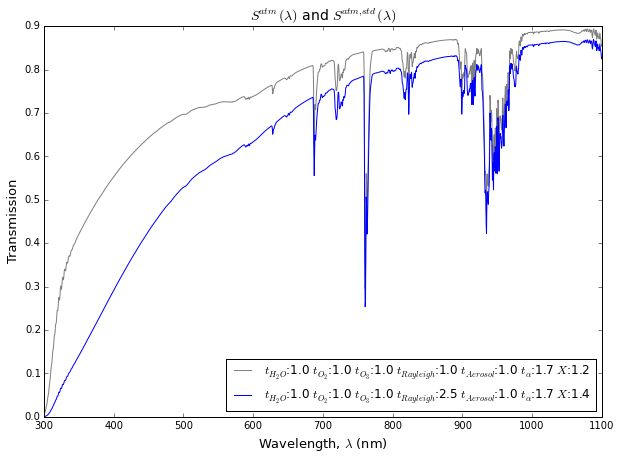

In [7]:
atmo_Rayleigh = ab.buildAtmo([1.0,1.0,1.0,2.5,1.0,1.7],1.4)
ab.transPlot(atmo_Rayleigh, includeStdAtmo=True)

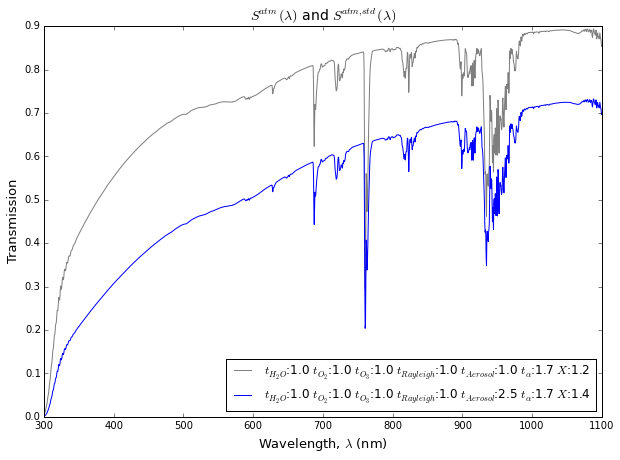

In [8]:
atmo_Aerosol = ab.buildAtmo([1.0,1.0,1.0,1.0,2.5,1.7],1.4)
ab.transPlot(atmo_Aerosol, includeStdAtmo=True)

In [9]:
atmo_Alpha = ab.buildAtmo([1.0,1.0,1.0,1.0,1.0,2.2],1.4)
ab.transPlot(atmo_Alpha, includeStdAtmo=True)

### $H_2O$ and $O_2$:

Computing nonlinear regression for H2O and O2.
Observed atmosphere parameters: [1.5, 0.5, 1.0, 1.0, 1.0, 1.7]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for H2O: 1.5
Observed atmosphere parameter for O2: 0.5

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X14_P150510101017_H2O_O2_XSTD12_DG0_E5_mss_u_50b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X14_P150510101017_H2O_O2_XSTD12_DG0_E5_mss_g_50b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X14_P150510101017_H2O_O2_XSTD12_DG0_E5_mss_r_50b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed results from 'pickles/X14_P150510101017_H2O_O2_XST

AtmoBuilder.py:884: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sedkeylist == None:
/Users/joachim/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):




Best fit parameters (Filter, H2O, O2):
u 1.53 0.41
g 1.43 5.00
r 1.43 0.51
i 1.53 0.51
z 1.53 0.00
y4 1.53 5.00


/Users/joachim/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


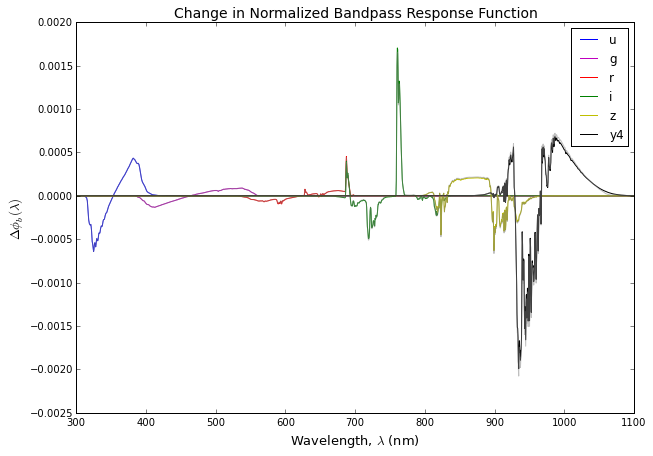

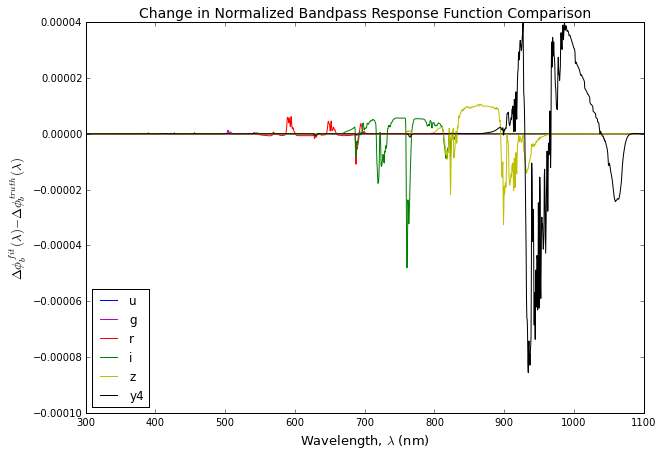

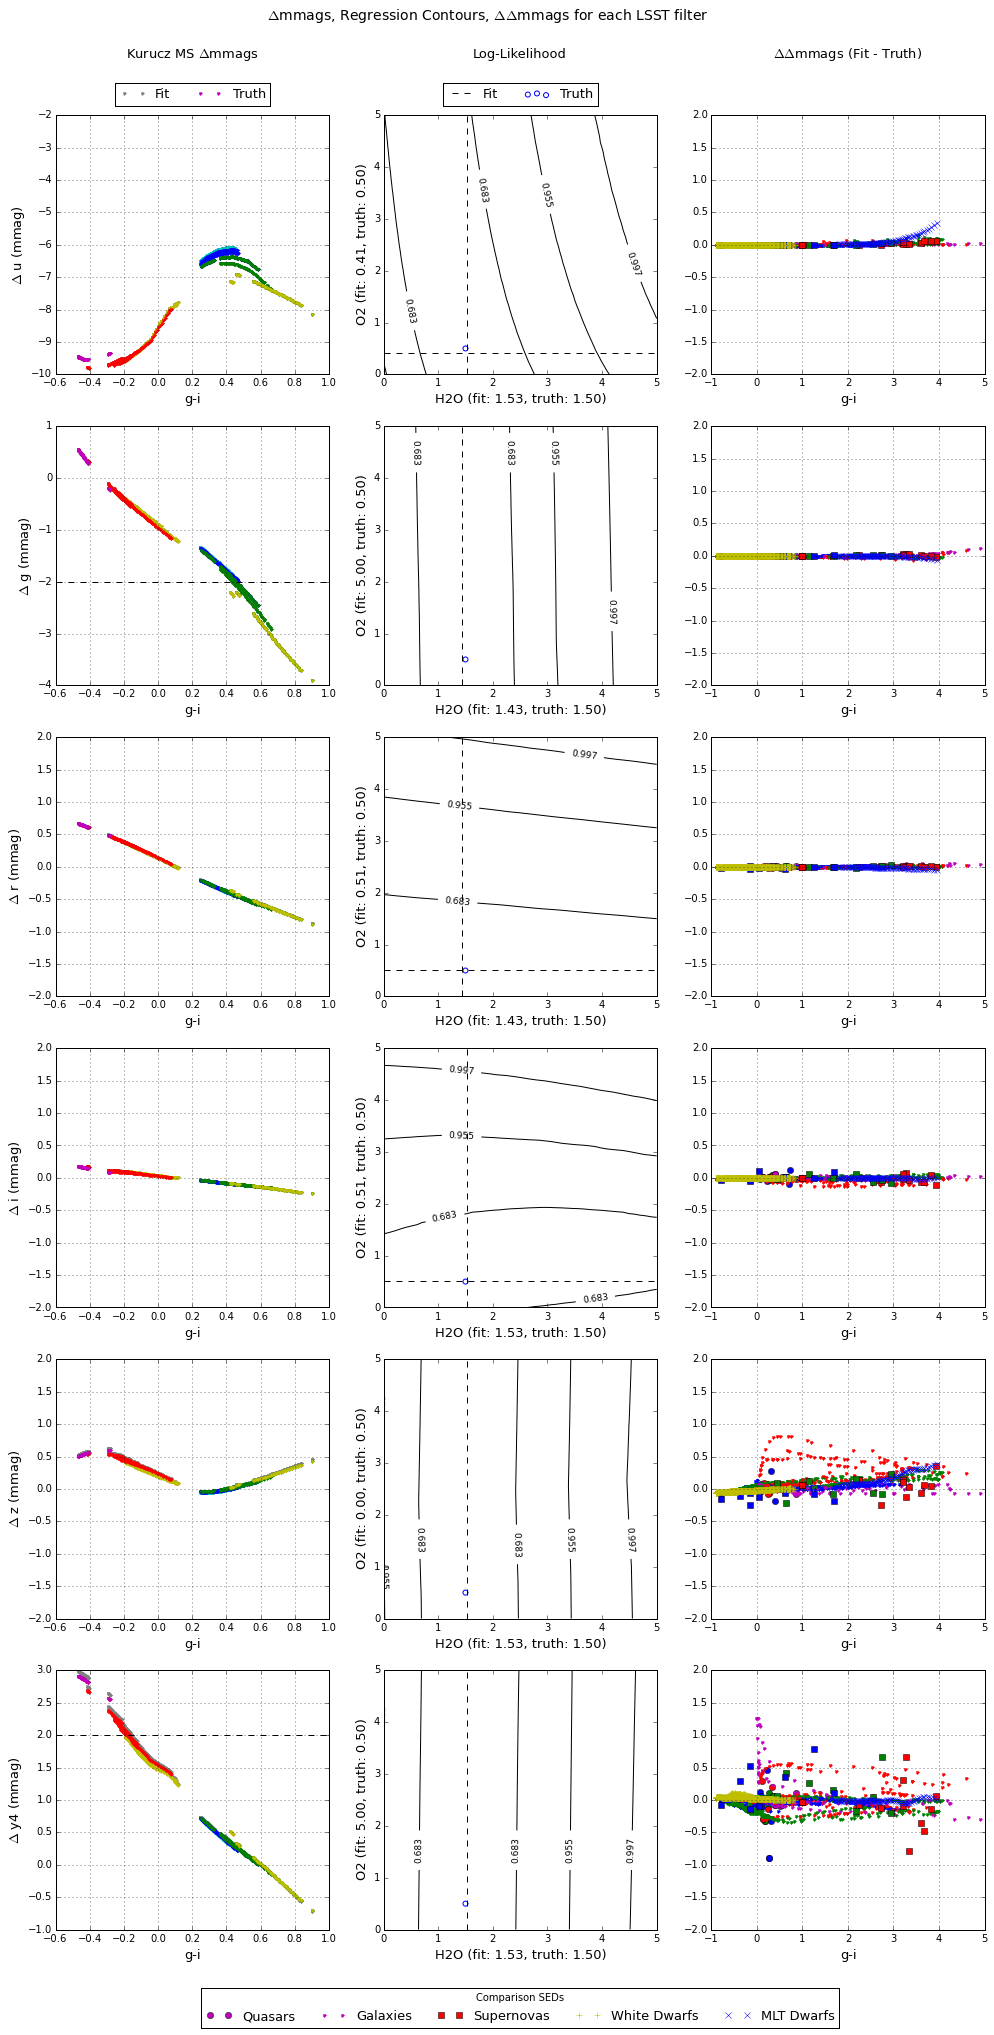

In [10]:
atmo = ab.buildAtmo([1.5,0.5,1.0,1.0,1.0,1.7],1.4)
ab.computeAtmoFit('H2O','O2',atmo)

Computing nonlinear regression for H2O and O2.
Observed atmosphere parameters: [0.5, 1.5, 1.0, 1.0, 1.0, 1.7]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for H2O: 0.5
Observed atmosphere parameter for O2: 1.5

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X14_P051510101017_H2O_O2_XSTD12_DG0_E5_mss_u_50b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X14_P051510101017_H2O_O2_XSTD12_DG0_E5_mss_g_50b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X14_P051510101017_H2O_O2_XSTD12_DG0_E5_mss_r_50b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed results from 'pickles/X14_P051510101017_H2O_O2_XST

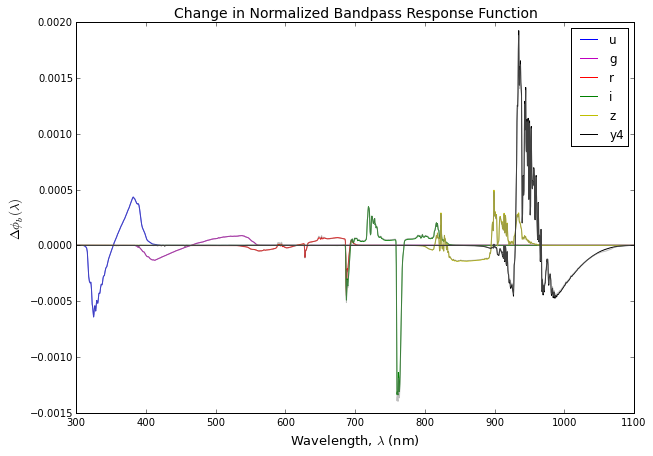

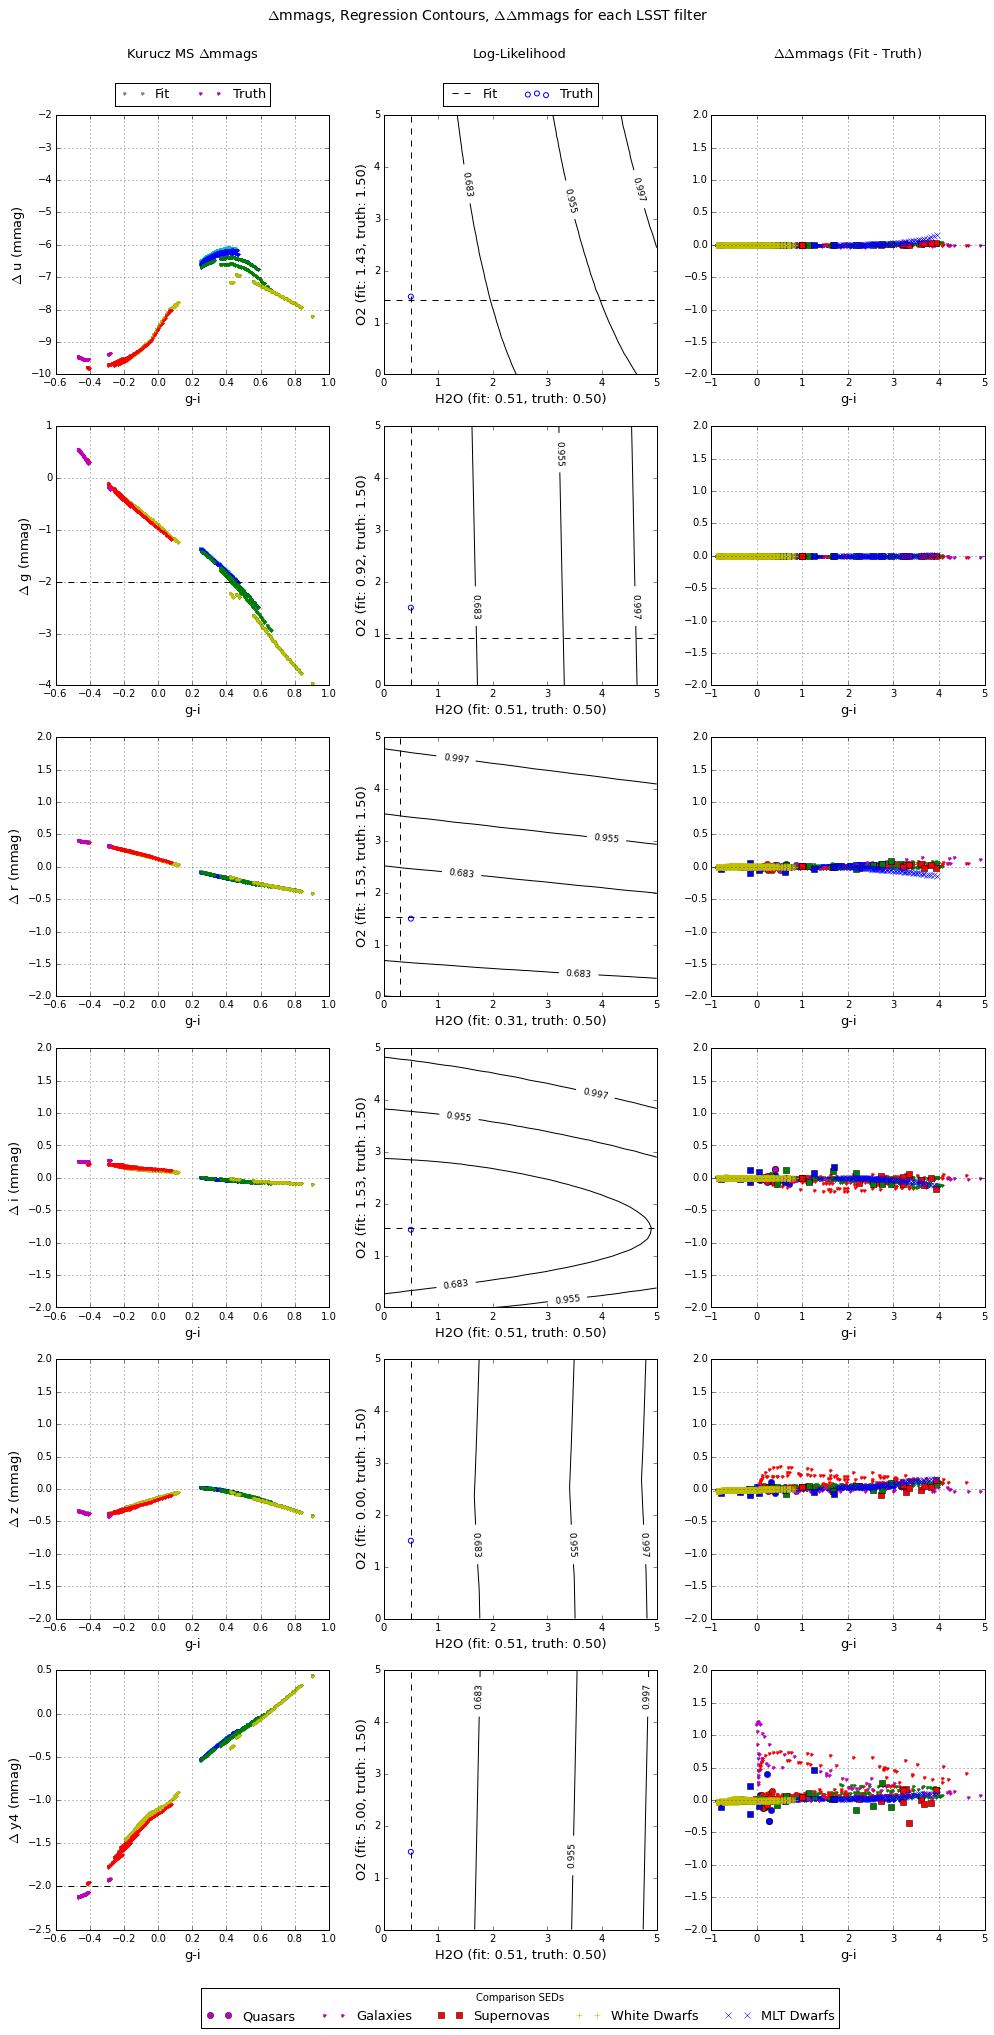

In [11]:
atmo = ab.buildAtmo([0.5,1.5,1.0,1.0,1.0,1.7],1.4)
ab.computeAtmoFit('H2O','O2',atmo)

### $O_2$ and $O_3$:

Computing nonlinear regression for O2 and O3.
Observed atmosphere parameters: [1.0, 1.5, 0.5, 1.0, 1.0, 1.7]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for O2: 1.5
Observed atmosphere parameter for O3: 0.5

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X14_P101505101017_O2_O3_XSTD12_DG0_E5_mss_u_50b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X14_P101505101017_O2_O3_XSTD12_DG0_E5_mss_g_50b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X14_P101505101017_O2_O3_XSTD12_DG0_E5_mss_r_50b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed results from 'pickles/X14_P101505101017_O2_O3_XSTD12_DG

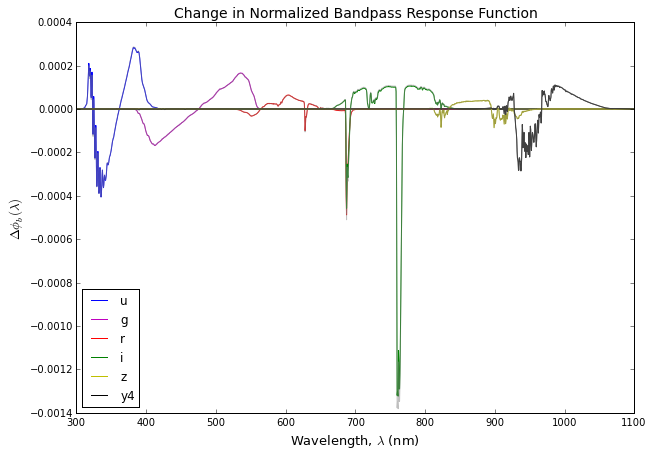

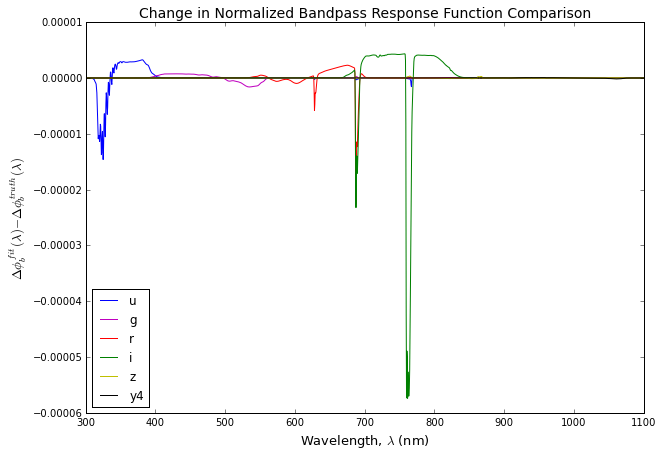

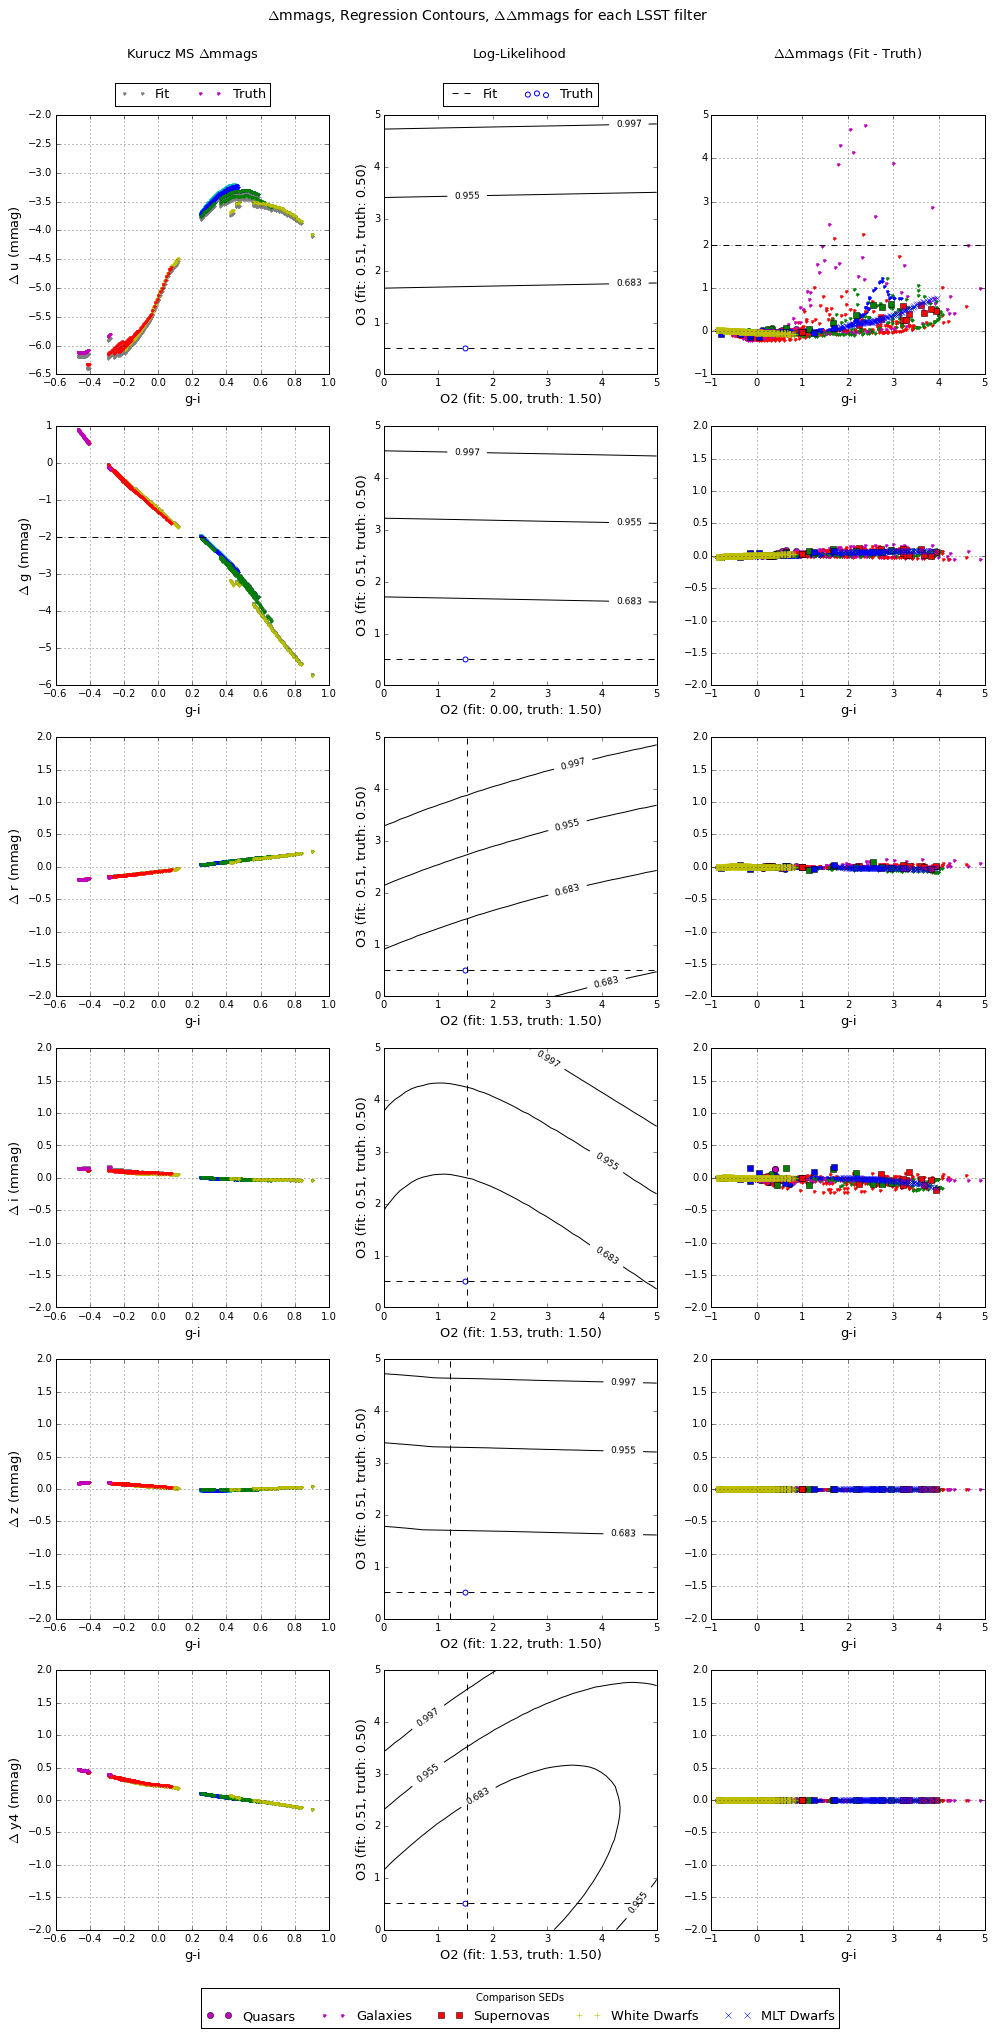

In [12]:
atmo = ab.buildAtmo([1.0,1.5,0.5,1.0,1.0,1.7],1.4)
ab.computeAtmoFit('O2','O3',atmo)

Computing nonlinear regression for O2 and O3.
Observed atmosphere parameters: [1.0, 0.5, 1.5, 1.0, 1.0, 1.7]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for O2: 0.5
Observed atmosphere parameter for O3: 1.5

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X14_P100515101017_O2_O3_XSTD12_DG0_E5_mss_u_50b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X14_P100515101017_O2_O3_XSTD12_DG0_E5_mss_g_50b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X14_P100515101017_O2_O3_XSTD12_DG0_E5_mss_r_50b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed results from 'pickles/X14_P100515101017_O2_O3_XSTD12_DG

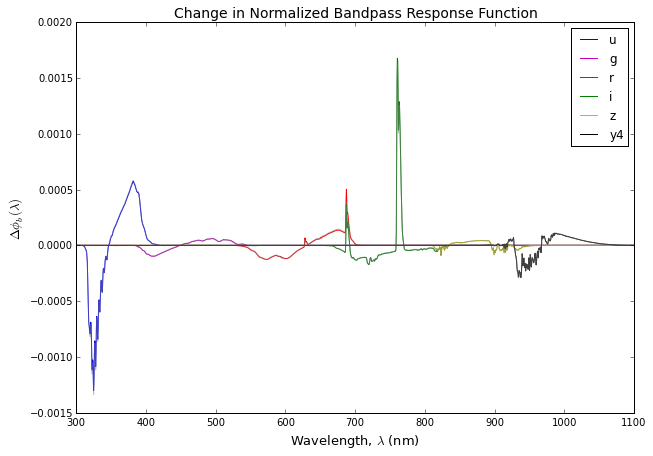

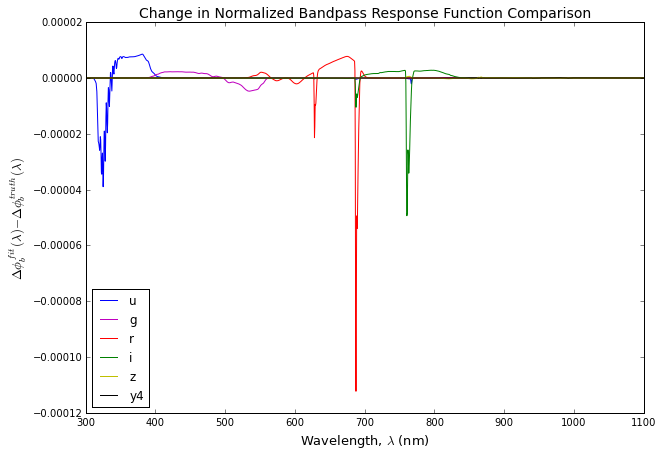

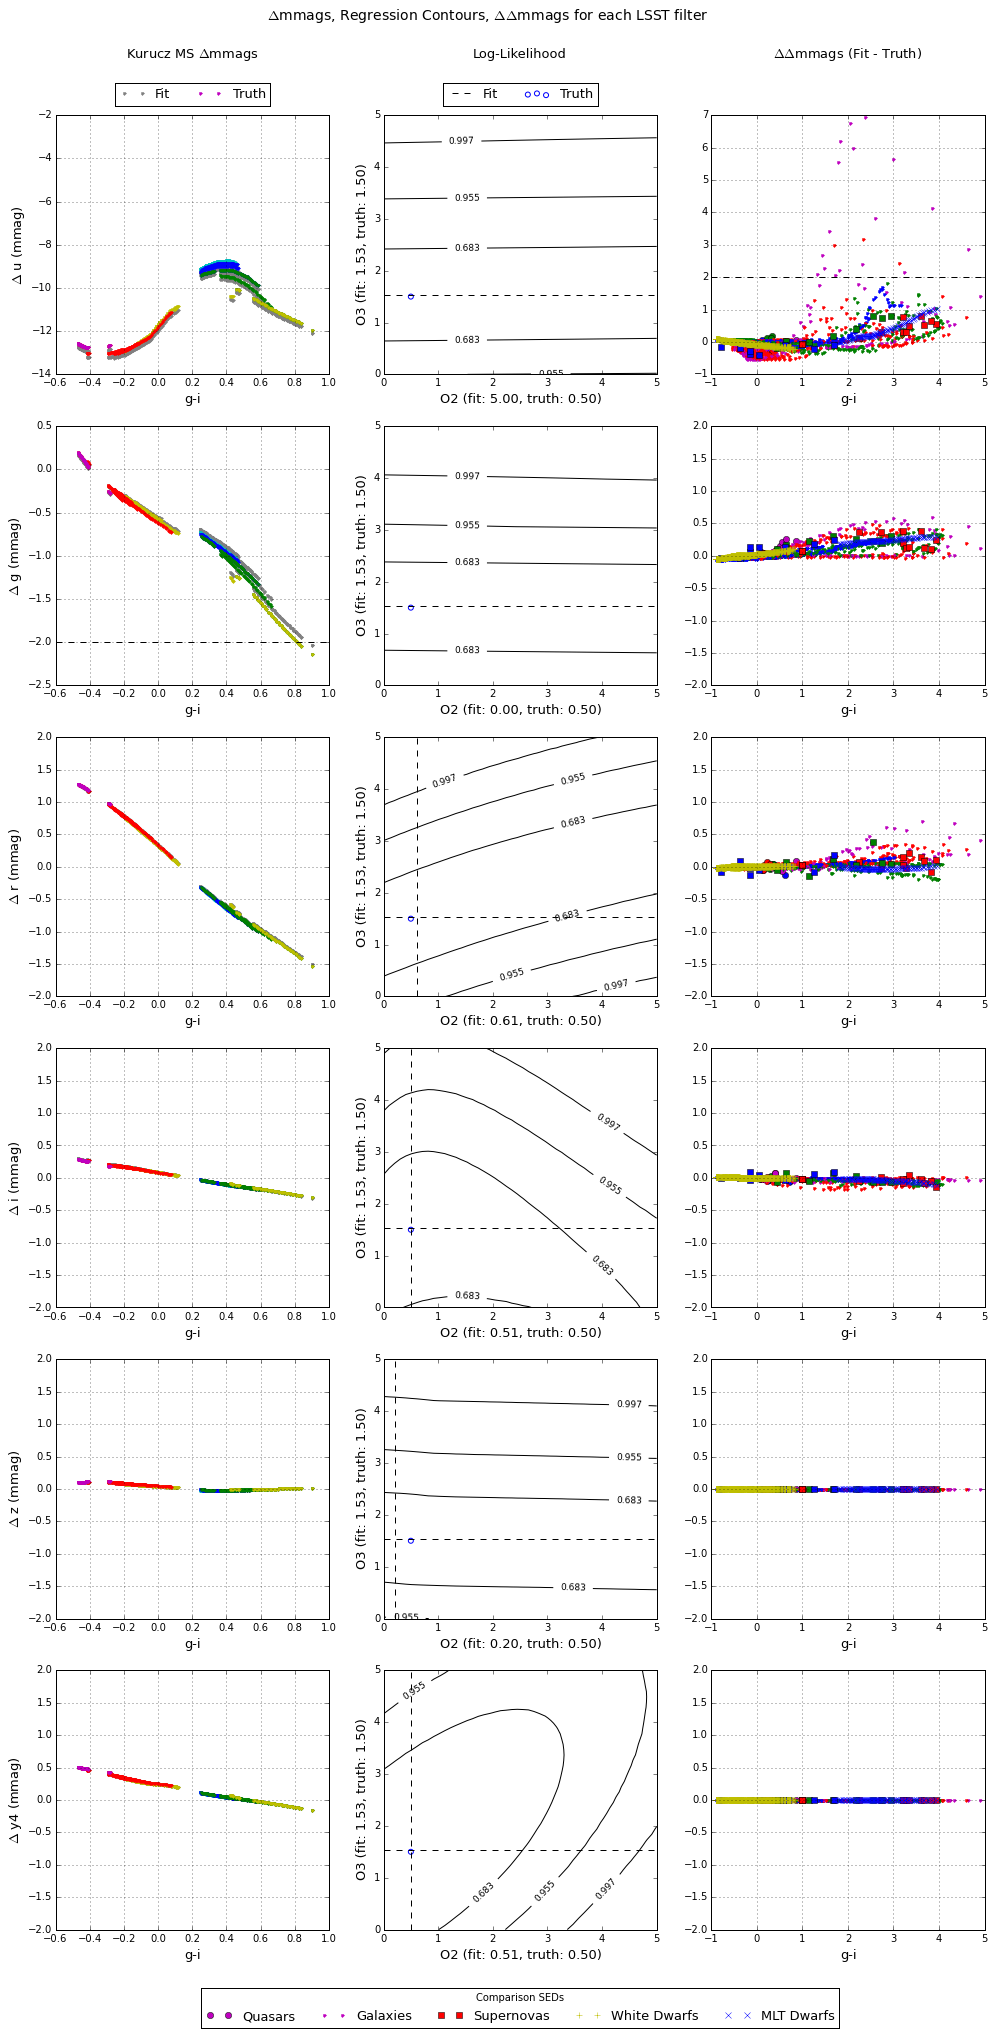

In [13]:
atmo = ab.buildAtmo([1.0,0.5,1.5,1.0,1.0,1.7],1.4)
ab.computeAtmoFit('O2','O3',atmo)

### Rayleigh and Aerosol:

Computing nonlinear regression for Rayleigh and Aerosol.
Observed atmosphere parameters: [1.0, 1.0, 1.0, 1.5, 0.5, 1.7]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for Rayleigh: 1.5
Observed atmosphere parameter for Aerosol: 0.5

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010150517_Rayleigh_Aerosol_XSTD12_DG0_E5_mss_u_50b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010150517_Rayleigh_Aerosol_XSTD12_DG0_E5_mss_g_50b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010150517_Rayleigh_Aerosol_XSTD12_DG0_E5_mss_r_50b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed 

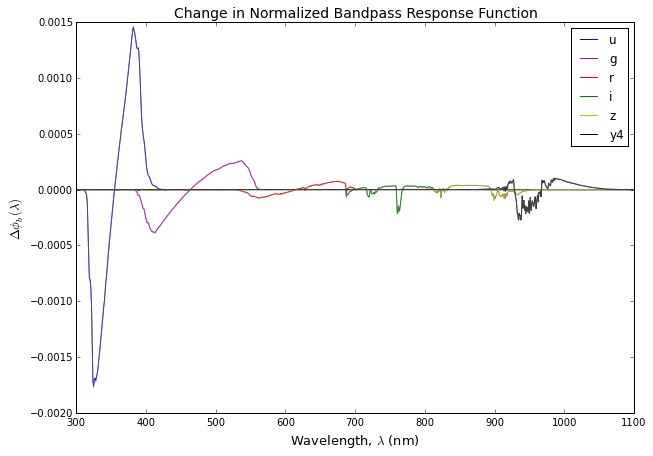

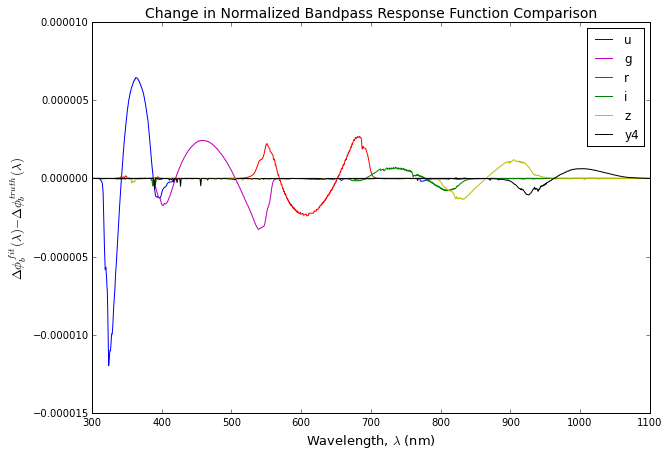

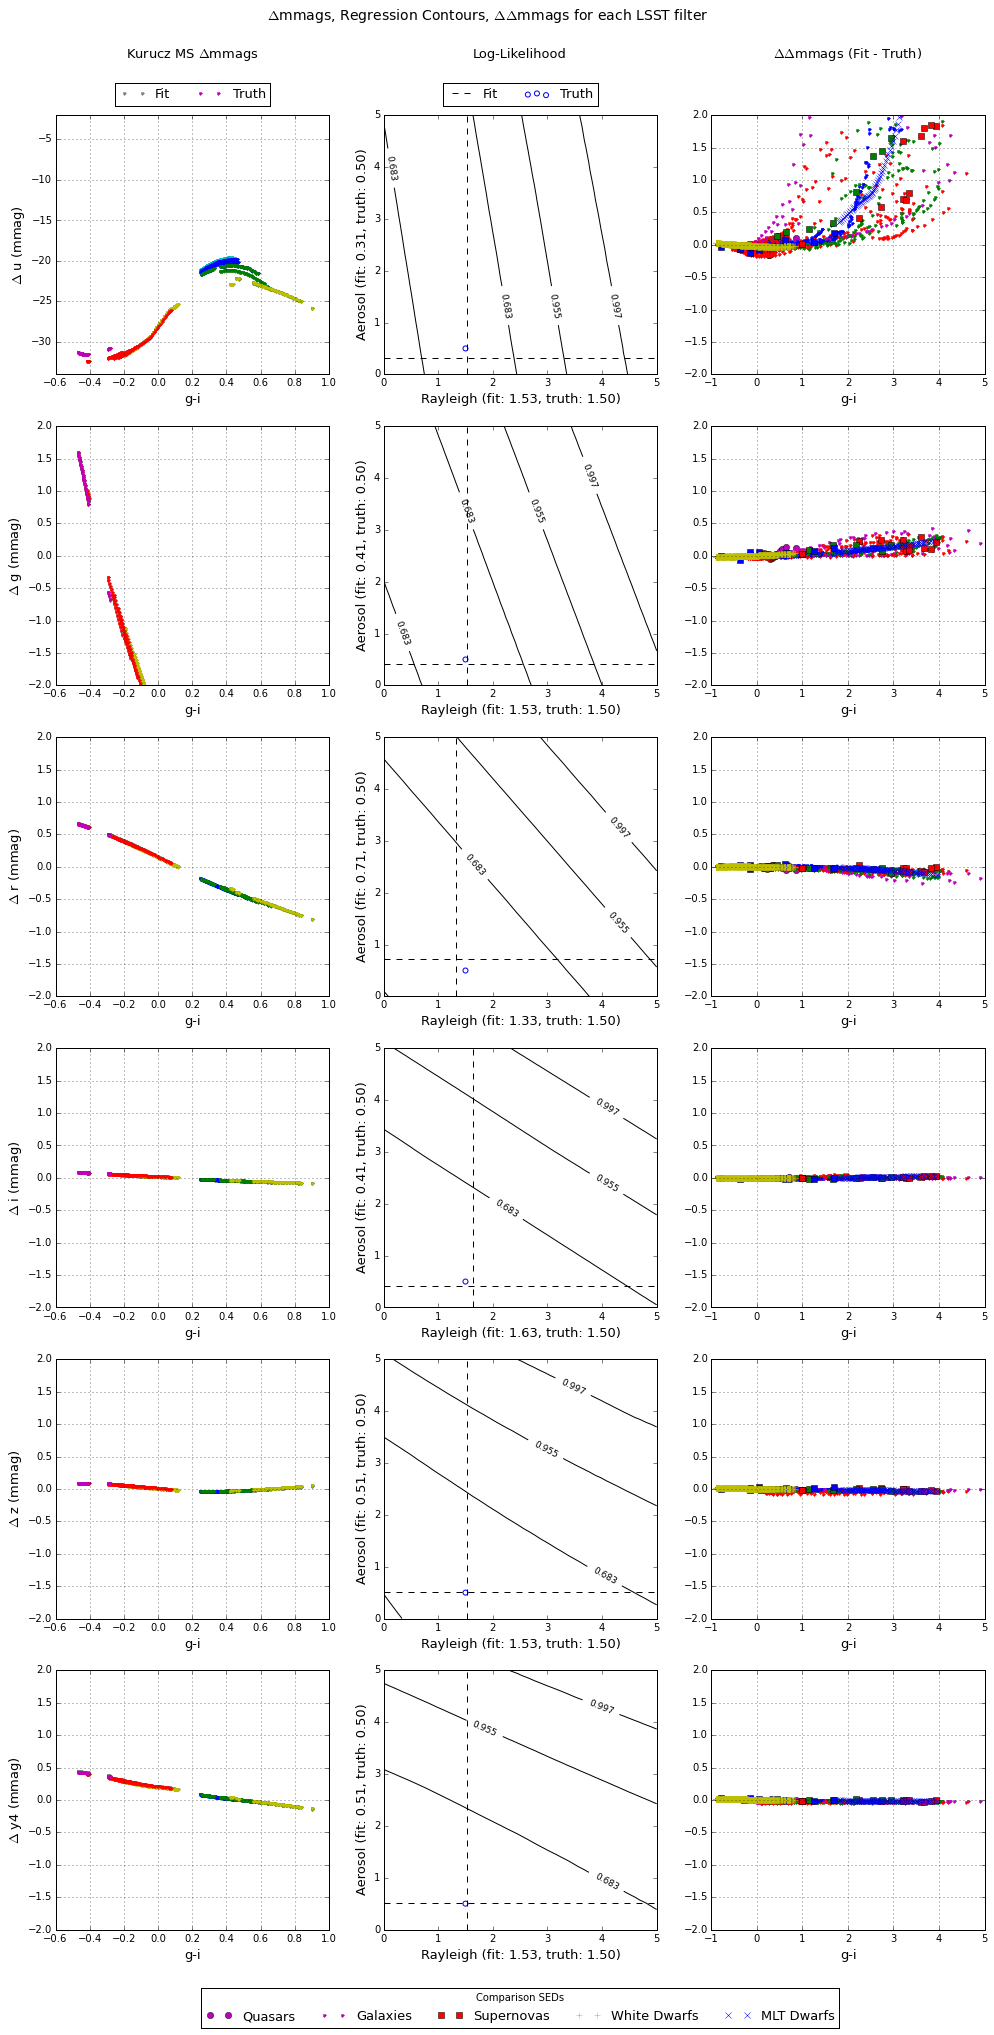

In [14]:
atmo = ab.buildAtmo([1.0,1.0,1.0,1.5,0.5,1.7],1.4)
ab.computeAtmoFit('Rayleigh','Aerosol',atmo)

Computing nonlinear regression for Rayleigh and Aerosol.
Observed atmosphere parameters: [1.0, 1.0, 1.0, 0.5, 1.5, 1.7]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for Rayleigh: 0.5
Observed atmosphere parameter for Aerosol: 1.5

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010051517_Rayleigh_Aerosol_XSTD12_DG0_E5_mss_u_50b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010051517_Rayleigh_Aerosol_XSTD12_DG0_E5_mss_g_50b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010051517_Rayleigh_Aerosol_XSTD12_DG0_E5_mss_r_50b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed 

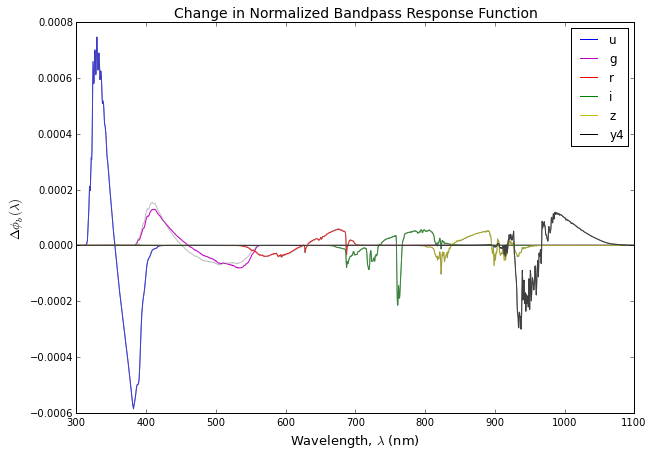

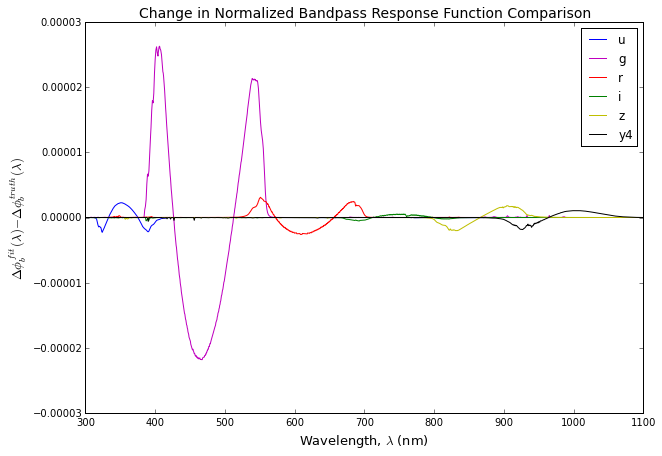

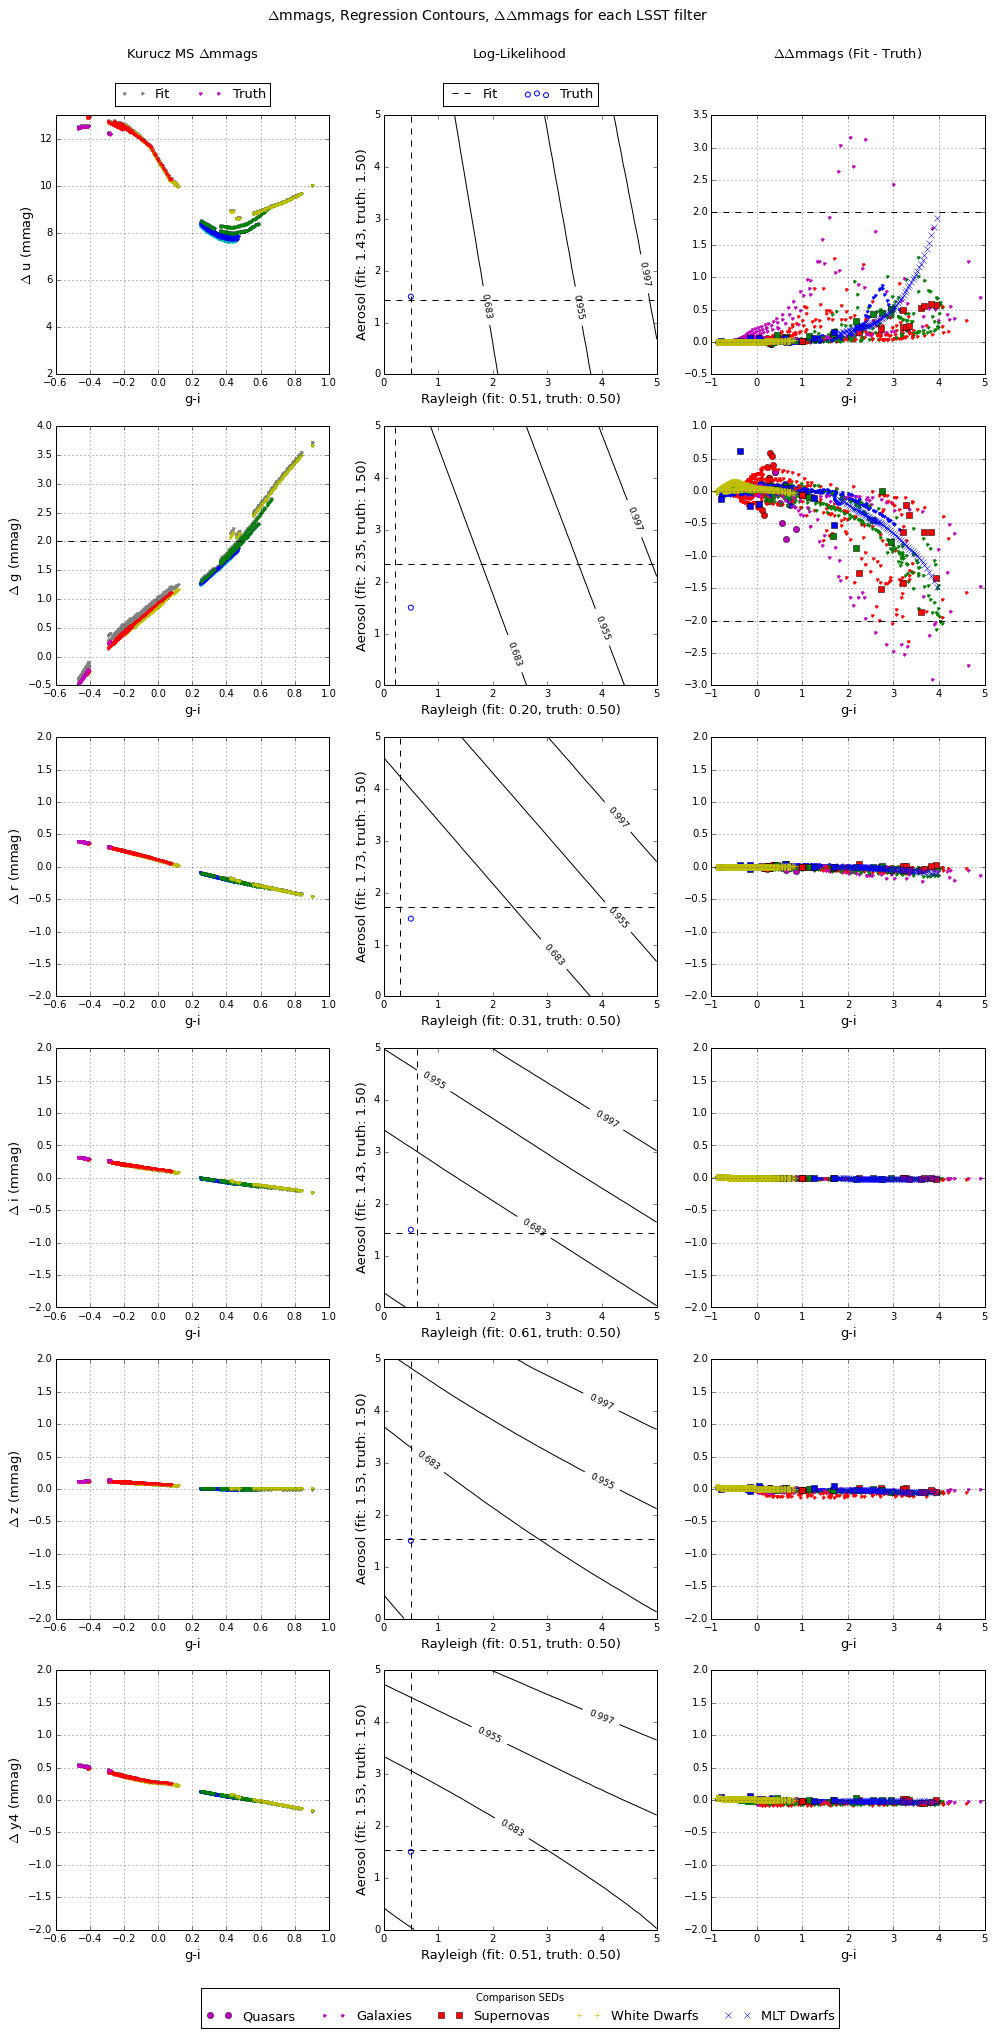

In [15]:
atmo = ab.buildAtmo([1.0,1.0,1.0,0.5,1.5,1.7],1.4)
ab.computeAtmoFit('Rayleigh','Aerosol',atmo)

### Rayleigh and Alpha:

Computing nonlinear regression for Rayleigh and Alpha.
Observed atmosphere parameters: [1.0, 1.0, 1.0, 0.5, 1.0, 2.2]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for Rayleigh: 0.5
Observed atmosphere parameter for Alpha: 2.2

Calculating best parameters for u filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010051022_Rayleigh_Alpha_XSTD12_DG0_E5_mss_u_50b.pkl'
Completed u filter.
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010051022_Rayleigh_Alpha_XSTD12_DG0_E5_mss_g_50b.pkl'
Completed g filter.
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010051022_Rayleigh_Alpha_XSTD12_DG0_E5_mss_r_50b.pkl'
Completed r filter.
Saved LogL for r filter.
Calculating best parameter

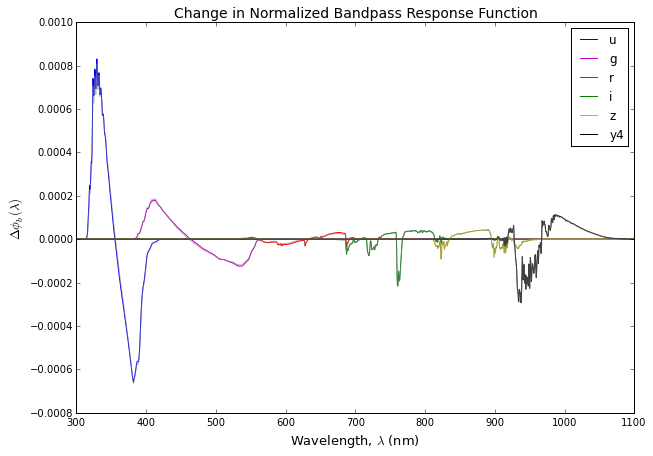

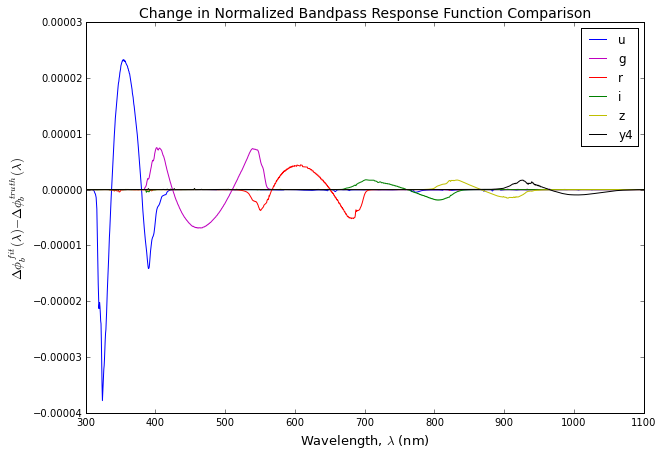

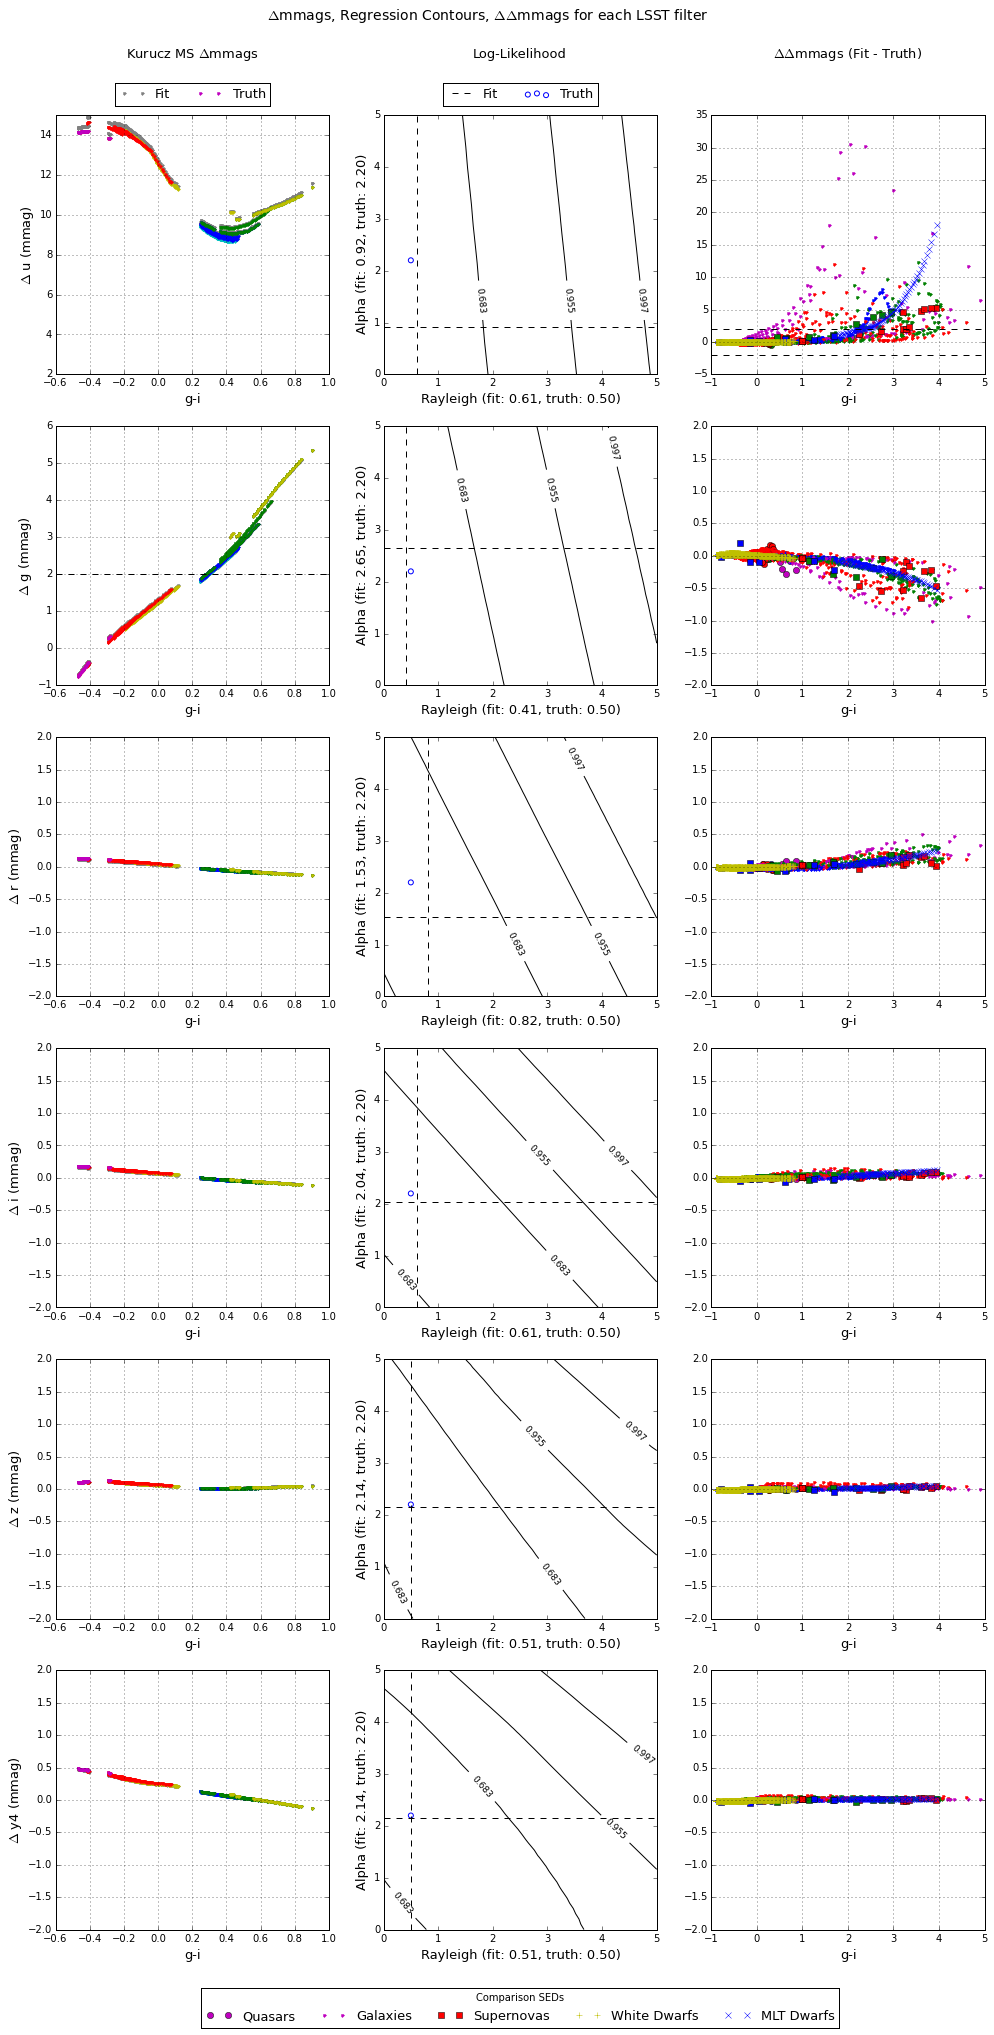

In [16]:
atmo = ab.buildAtmo([1.0,1.0,1.0,0.5,1.0,2.2],1.4)
ab.computeAtmoFit('Rayleigh','Alpha',atmo)

Computing nonlinear regression for Rayleigh and Alpha.
Observed atmosphere parameters: [1.0, 1.0, 1.0, 1.5, 1.0, 1.2]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for Rayleigh: 1.5
Observed atmosphere parameter for Alpha: 1.2

Calculating best parameters for u filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010151012_Rayleigh_Alpha_XSTD12_DG0_E5_mss_u_50b.pkl'
Completed u filter.
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010151012_Rayleigh_Alpha_XSTD12_DG0_E5_mss_g_50b.pkl'
Completed g filter.
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010151012_Rayleigh_Alpha_XSTD12_DG0_E5_mss_r_50b.pkl'
Completed r filter.
Saved LogL for r filter.
Calculating best parameter

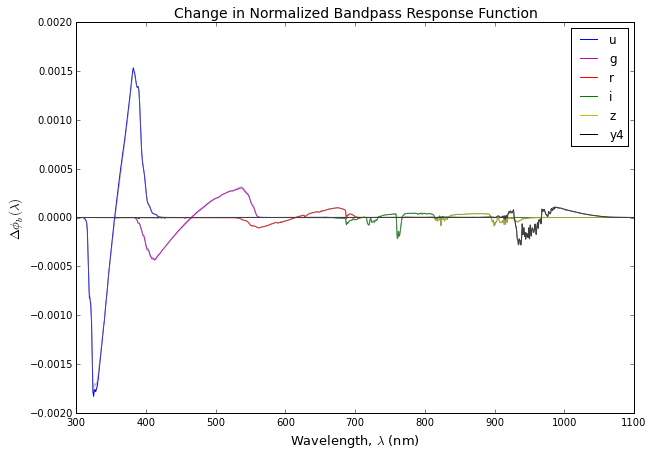

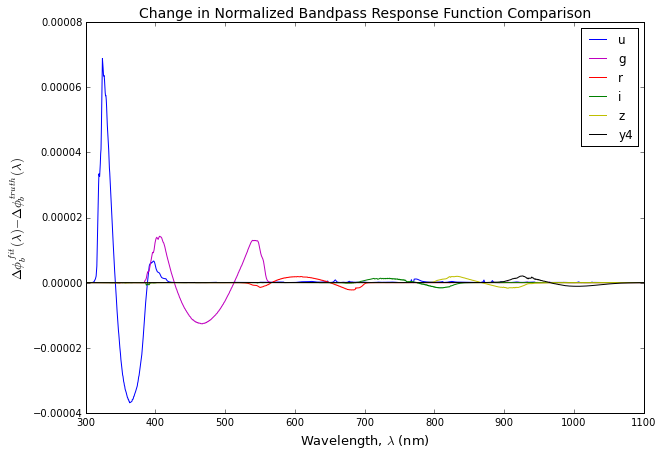

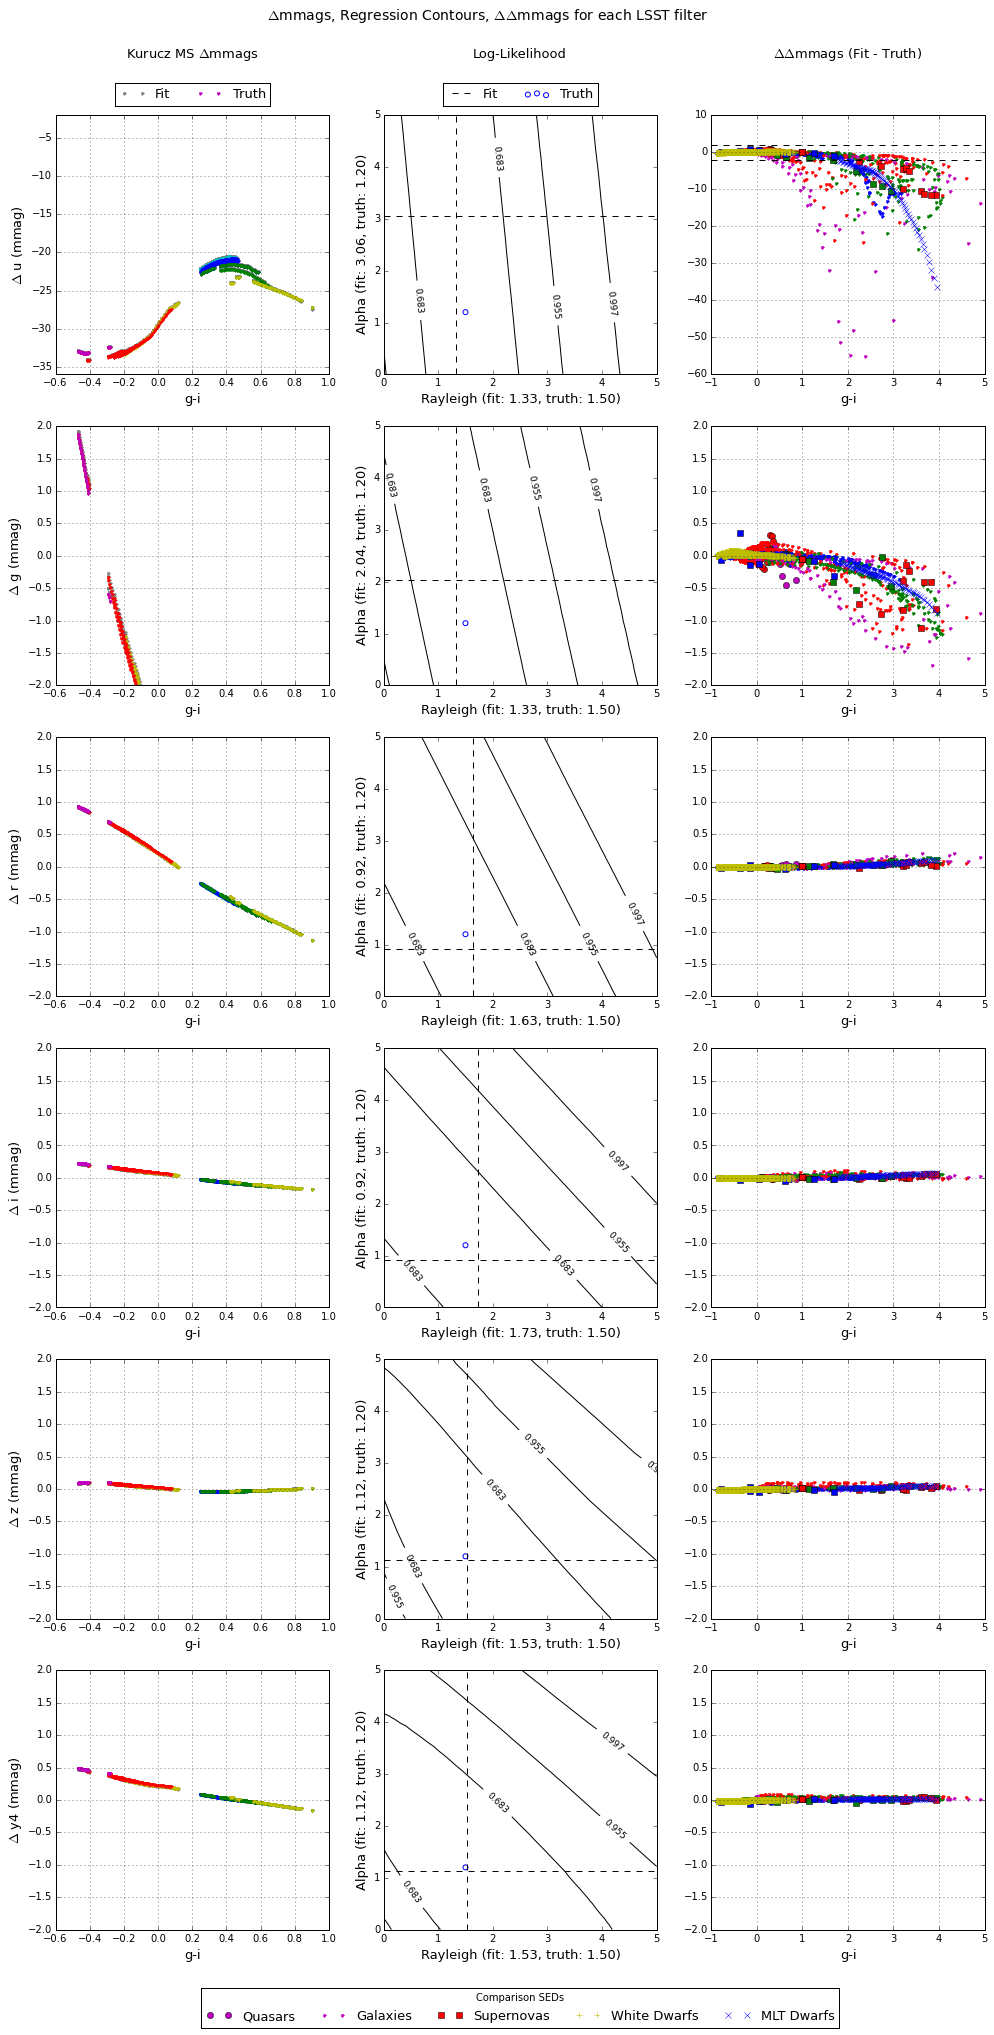

In [17]:
atmo = ab.buildAtmo([1.0,1.0,1.0,1.5,1.0,1.2],1.4)
ab.computeAtmoFit('Rayleigh','Alpha',atmo)

### Aerosol and Alpha:

Computing nonlinear regression for Alpha and Aerosol.
Observed atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.5, 1.2]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for Alpha: 1.2
Observed atmosphere parameter for Aerosol: 1.5

Calculating best parameters for u filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010101512_Alpha_Aerosol_XSTD12_DG0_E5_mss_u_50b.pkl'
Completed u filter.
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010101512_Alpha_Aerosol_XSTD12_DG0_E5_mss_g_50b.pkl'
Completed g filter.
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010101512_Alpha_Aerosol_XSTD12_DG0_E5_mss_r_50b.pkl'
Completed r filter.
Saved LogL for r filter.
Calculating best parameters for

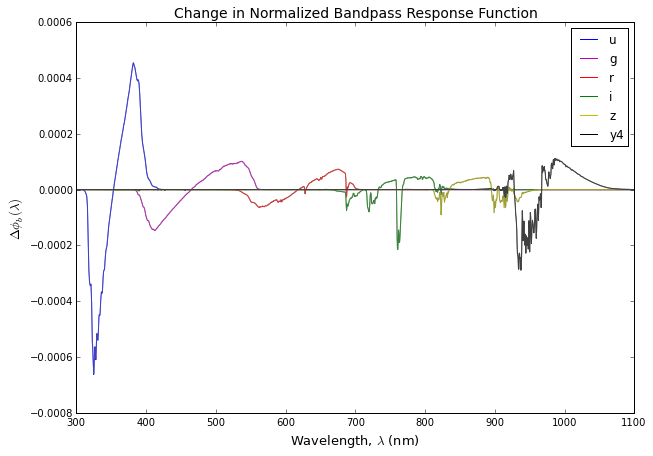

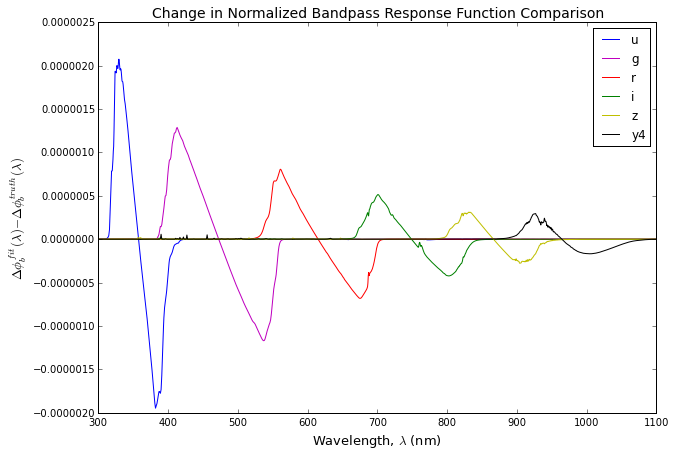

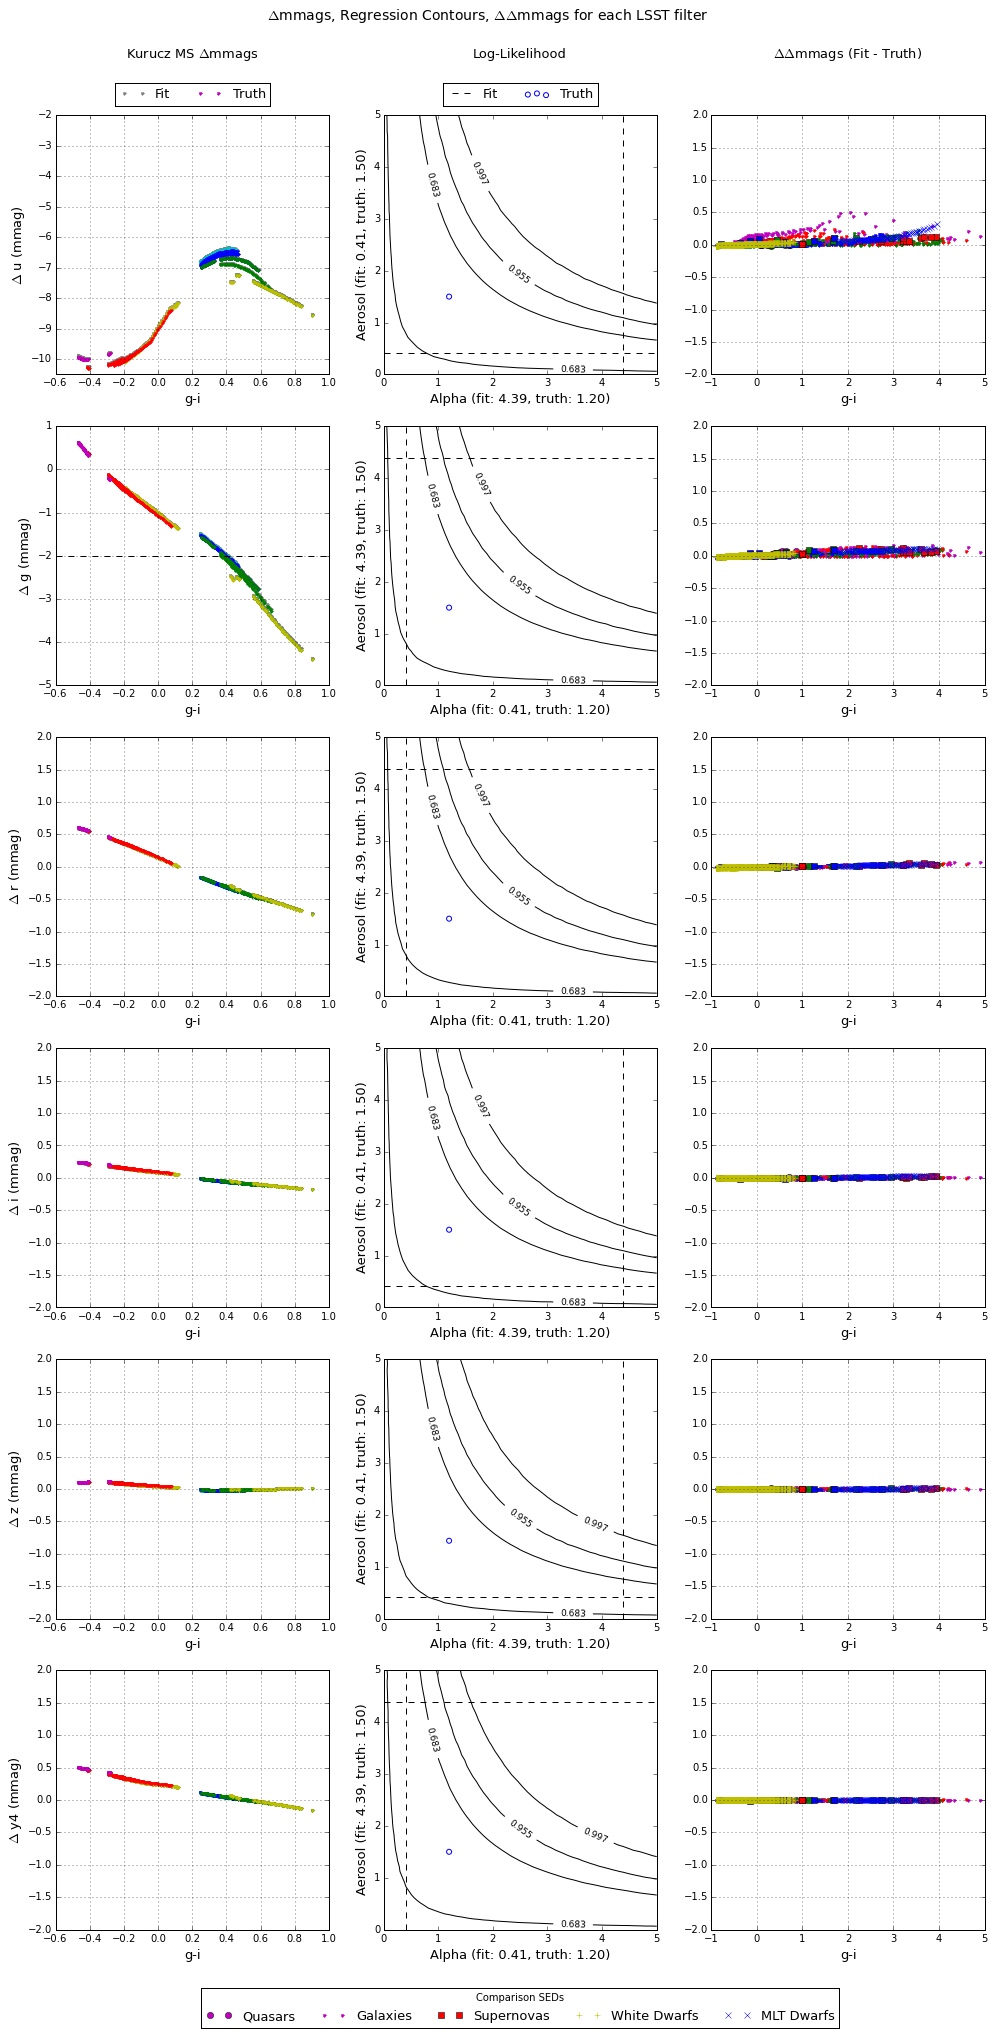

In [18]:
atmo = ab.buildAtmo([1.0,1.0,1.0,1.0,1.5,1.2],1.4)
ab.computeAtmoFit('Alpha','Aerosol',atmo)

Computing nonlinear regression for Alpha and Aerosol.
Observed atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 0.5, 2.2]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for Alpha: 2.2
Observed atmosphere parameter for Aerosol: 0.5

Calculating best parameters for u filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010100522_Alpha_Aerosol_XSTD12_DG0_E5_mss_u_50b.pkl'
Completed u filter.
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010100522_Alpha_Aerosol_XSTD12_DG0_E5_mss_g_50b.pkl'
Completed g filter.
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: computing results and saving to 'pickles/X14_P101010100522_Alpha_Aerosol_XSTD12_DG0_E5_mss_r_50b.pkl'
Completed r filter.
Saved LogL for r filter.
Calculating best parameters for

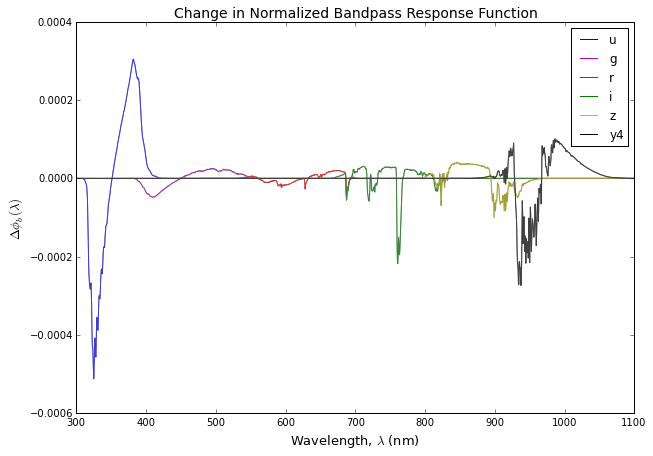

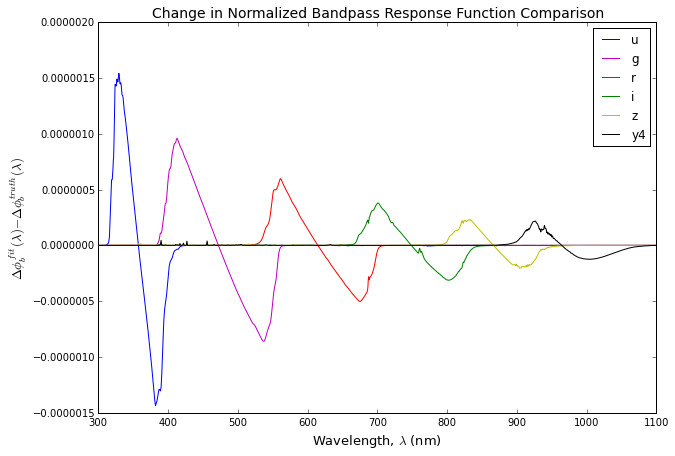

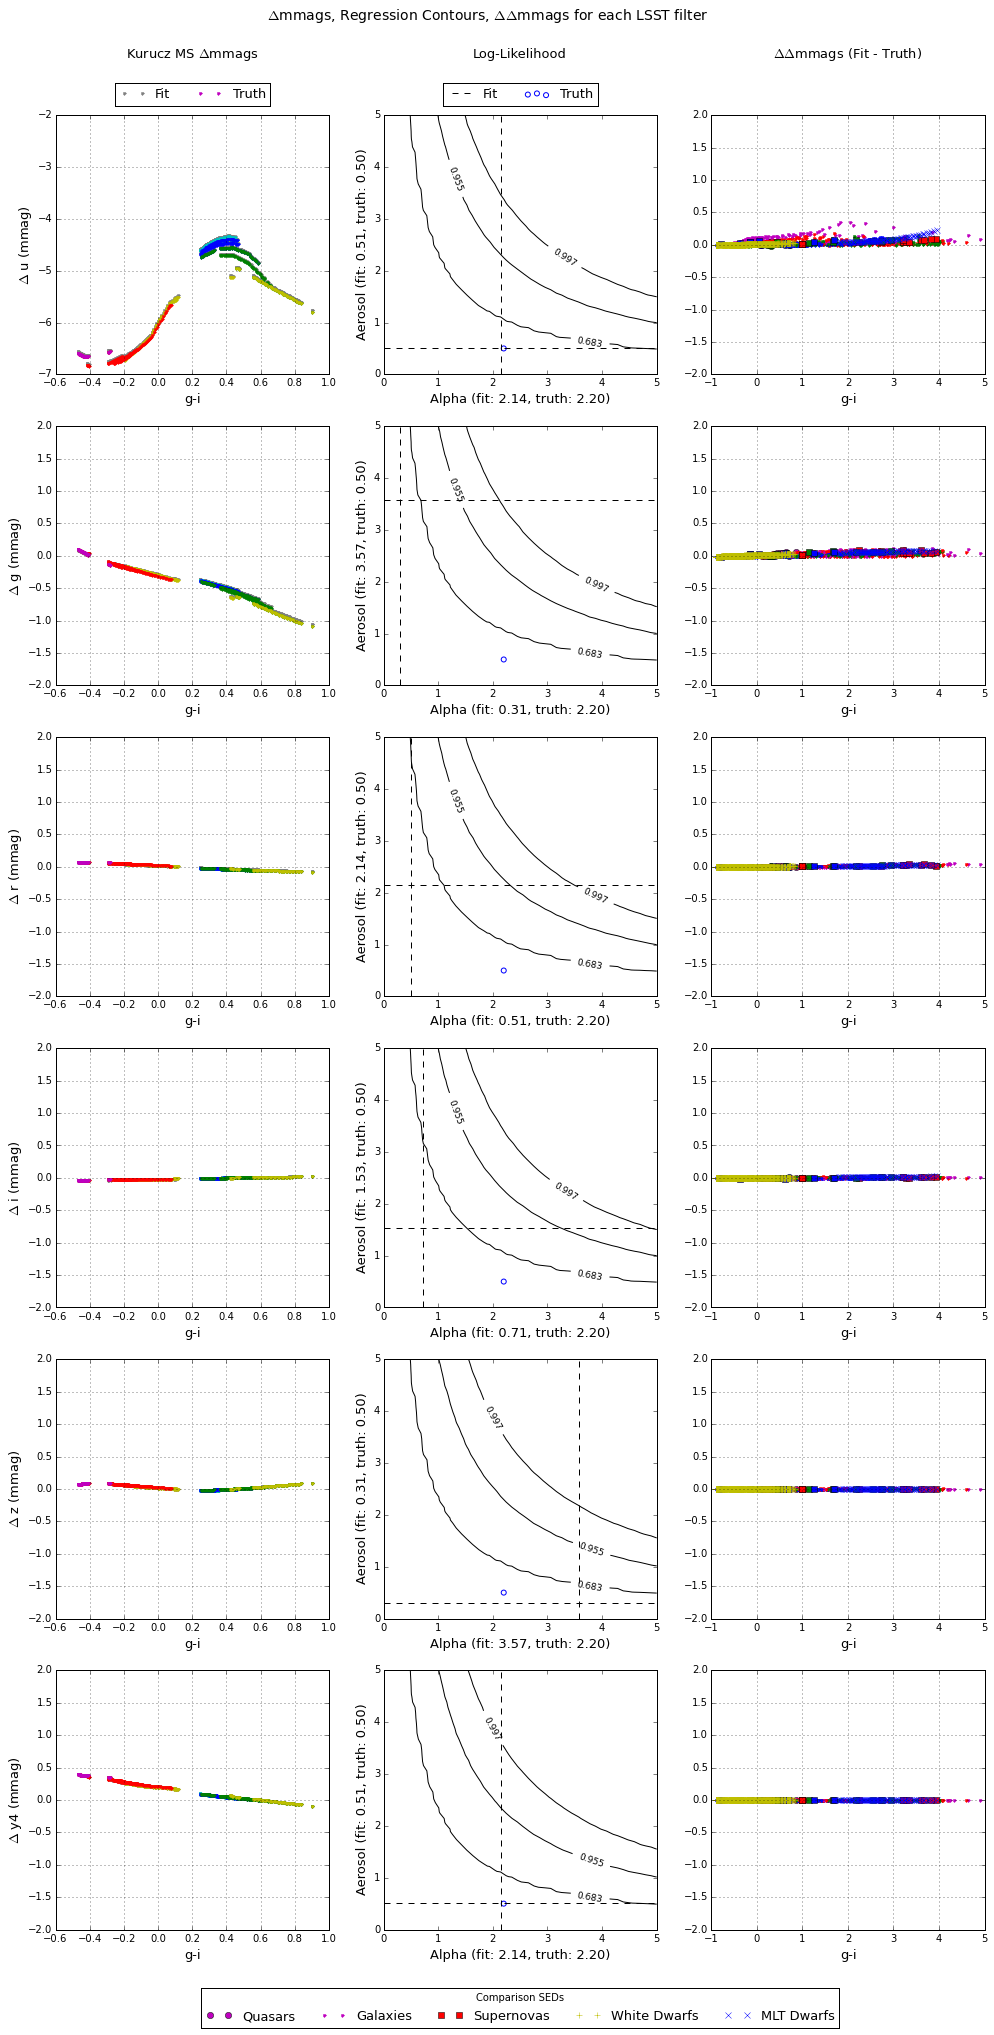

In [19]:
atmo = ab.buildAtmo([1.0,1.0,1.0,1.0,0.5,2.2],1.4)
ab.computeAtmoFit('Alpha','Aerosol',atmo)

Computing nonlinear regression for Alpha and Aerosol.
Observed atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 0.5, 2.2]
Observed atmosphere airmass:    1.4
Standard atmosphere parameters: [1.0, 1.0, 1.0, 1.0, 1.0, 1.7]
Standard atmosphere airmass:    1.2
Observed atmosphere parameter for Alpha: 2.2
Observed atmosphere parameter for Aerosol: 0.5

Calculating best parameters for u filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010100522_Alpha_Aerosol_XSTD12_DG0_E5_mss_u_50b.pkl'
Saved LogL for u filter.
Calculating best parameters for g filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010100522_Alpha_Aerosol_XSTD12_DG0_E5_mss_g_50b.pkl'
Saved LogL for g filter.
Calculating best parameters for r filter...
@pickle_results: using precomputed results from 'pickles/X14_P101010100522_Alpha_Aerosol_XSTD12_DG0_E5_mss_r_50b.pkl'
Saved LogL for r filter.
Calculating best parameters for i filter...
@pickle_results: using precomputed results from 'p

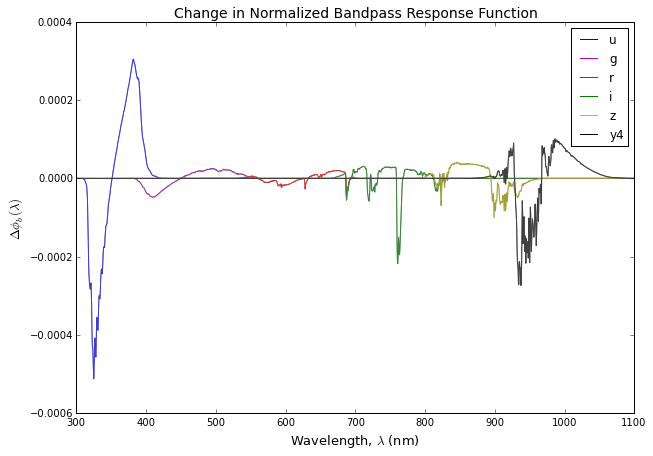

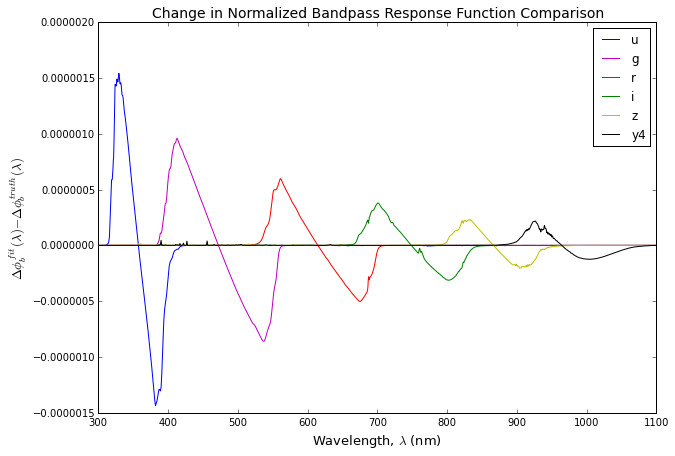

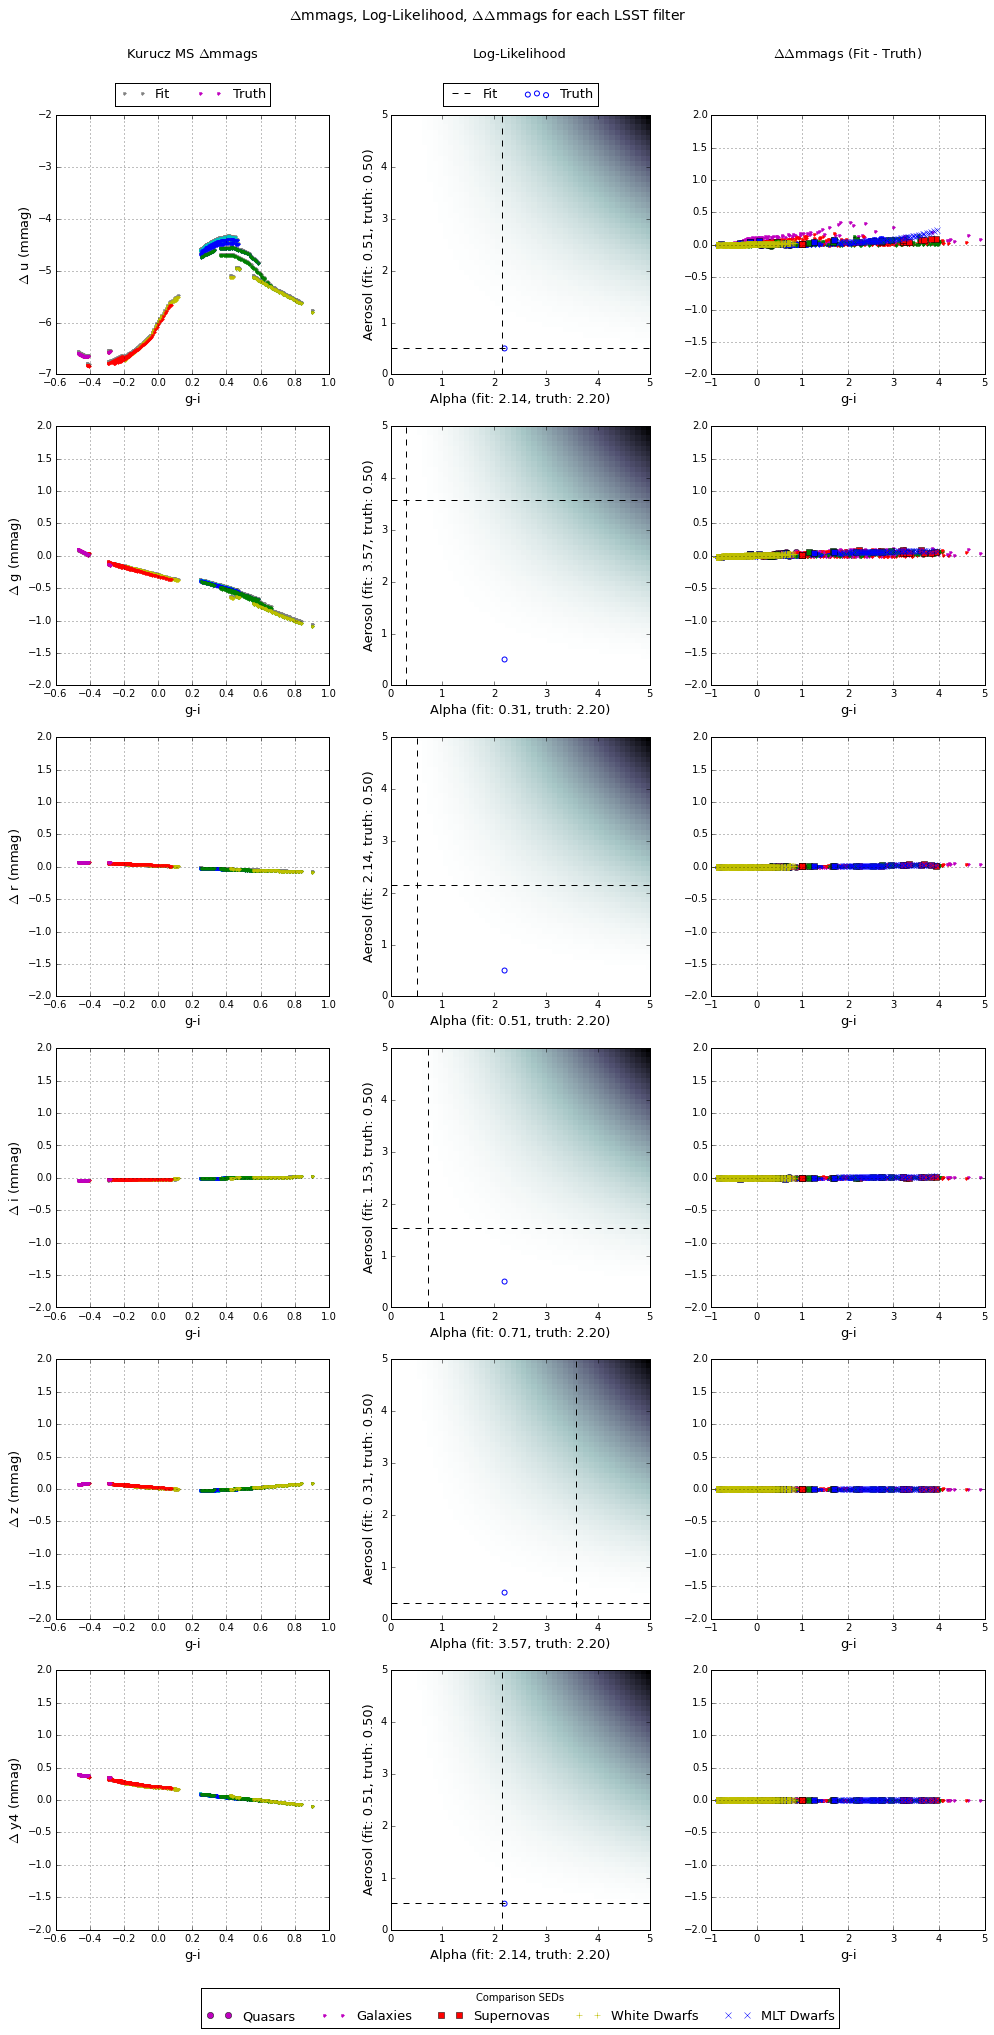

In [20]:
atmo = ab.buildAtmo([1.0,1.0,1.0,1.0,0.5,2.2],1.4)
ab.computeAtmoFit('Alpha','Aerosol',atmo,useLogL=True)